In [1]:
import os
import numpy as np
from PIL import Image
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [2]:
notebook_name = os.path.basename(os.getcwd())
timestamp="07"

In [3]:
path_movie_dir = '../data/movie/fps30_mask/'
path_save_dir = os.path.join('../data/03_PlotPoints/', timestamp)
if not os.path.exists(path_save_dir):
    os.makedirs(path_save_dir)

In [4]:
path_action_dir = os.path.join('../data/01_DataProcessing/', timestamp)
path_point_dir = os.path.join('../data/02_GetPoints/', timestamp)

In [5]:
file_names = ['fall','sitdown', 'standup', 'test']
# file_names = ['forehand']
movie_names = [file_name + '.MOV' for file_name in file_names]
points_file_names = [file_name + '.csv' for file_name in file_names]

In [6]:
path_label_name_file = '../data/labels/labels_num.csv'

In [36]:
num = 0
path_action = os.path.join(path_action_dir, points_file_names[num])
path_point = os.path.join(path_point_dir, points_file_names[num])
action_df = pd.read_csv(path_action)
point_df = pd.read_csv(path_point)

In [37]:
point_df.head()

,Nose_x,Nose_y,Neck_x,Neck_y,RShoulder_x,RShoulder_y,RElbow_x,RElbow_y,RWrist_x,RWrist_y,...,LAnkle_x,LAnkle_y,REye_x,REye_y,LEye_x,LEye_y,REar_x,REar_y,LEar_x,LEar_y
0,0.168722,0.361548,0.184287,0.426038,0.140705,0.432487,0.125140,0.516324,0.112688,0.574365,...,0.237209,0.787183,0.162496,0.348650,0.178061,0.348650,0.150044,0.361548,0.196740,0.361548
1,0.168722,0.361548,0.184287,0.426038,0.143818,0.432487,0.128253,0.516324,0.115801,0.574365,...,0.240322,0.793632,0.162496,0.355099,0.178061,0.348650,0.153157,0.361548,0.196740,0.361548
2,0.171835,0.361548,0.184287,0.426038,0.143818,0.438936,0.128253,0.522773,0.118914,0.580814,...,0.249661,0.793632,0.165609,0.355099,0.181174,0.348650,0.153157,0.361548,0.199853,0.361548
3,0.174948,0.361548,0.187401,0.419589,0.143818,0.432487,0.131366,0.522773,0.122027,0.580814,...,0.252774,0.793632,0.168722,0.355099,0.184287,0.355099,0.156270,0.361548,0.199853,0.361548
4,0.174948,0.361548,0.187401,0.419589,0.146931,0.432487,0.134479,0.516324,0.125140,0.580814,...,0.255887,0.787183,0.168722,0.355099,0.184287,0.355099,0.159383,0.367997,0.202966,0.361548


In [38]:
label_names = pd.read_csv(path_label_name_file)

In [39]:
objective = 'action_gt_name'

In [40]:

action_dict = label_names.to_dict()[objective]

In [41]:
body_parts_list = ["Nose_x","Nose_y","Neck_x","Neck_y","RShoulder_x","RShoulder_y","RElbow_x","RElbow_y","RWrist_x","RWrist_y","LShoulde_x""LShoulde_y","LElbow_x","LElbow_y","LWrist_x","LWrist_y","RHip_x","RHip_y","RKnee_x","RKnee_y","RAnkle_x","RAnkle_y","LHip_x","LHip_y","LKnee_x","LKnee_y","LAnkle_x","LAnkle_y","REye_x","REye_y","LEye_x","LEye_y","REar_x","REar_y","LEar_x","LEar_y"
]

In [42]:
times = np.arange(0, len(point_df))

In [43]:
start = 0
end = max(times)

In [44]:
body_parts = ["Nose_x","Nose_y","Neck_x","Neck_y","RShoulder_x","RShoulder_y","RElbow_x","RElbow_y","RWrist_x","RWrist_y","LShoulde_x","LShoulde_y","LElbow_x","LElbow_y","LWrist_x","LWrist_y","RHip_x","RHip_y","RKnee_x","RKnee_y","RAnkle_x","RAnkle_y","LHip_x","LHip_y","LKnee_x","LKnee_y","LAnkle_x","LAnkle_y","REye_x","REye_y","LEye_x","LEye_y","REar_x","REar_y","LEar_x","LEar_y"
]
body_parts

['Nose_x',
 'Nose_y',
 'Neck_x',
 'Neck_y',
 'RShoulder_x',
 'RShoulder_y',
 'RElbow_x',
 'RElbow_y',
 'RWrist_x',
 'RWrist_y',
 'LShoulde_x',
 'LShoulde_y',
 'LElbow_x',
 'LElbow_y',
 'LWrist_x',
 'LWrist_y',
 'RHip_x',
 'RHip_y',
 'RKnee_x',
 'RKnee_y',
 'RAnkle_x',
 'RAnkle_y',
 'LHip_x',
 'LHip_y',
 'LKnee_x',
 'LKnee_y',
 'LAnkle_x',
 'LAnkle_y',
 'REye_x',
 'REye_y',
 'LEye_x',
 'LEye_y',
 'REar_x',
 'REar_y',
 'LEar_x',
 'LEar_y']

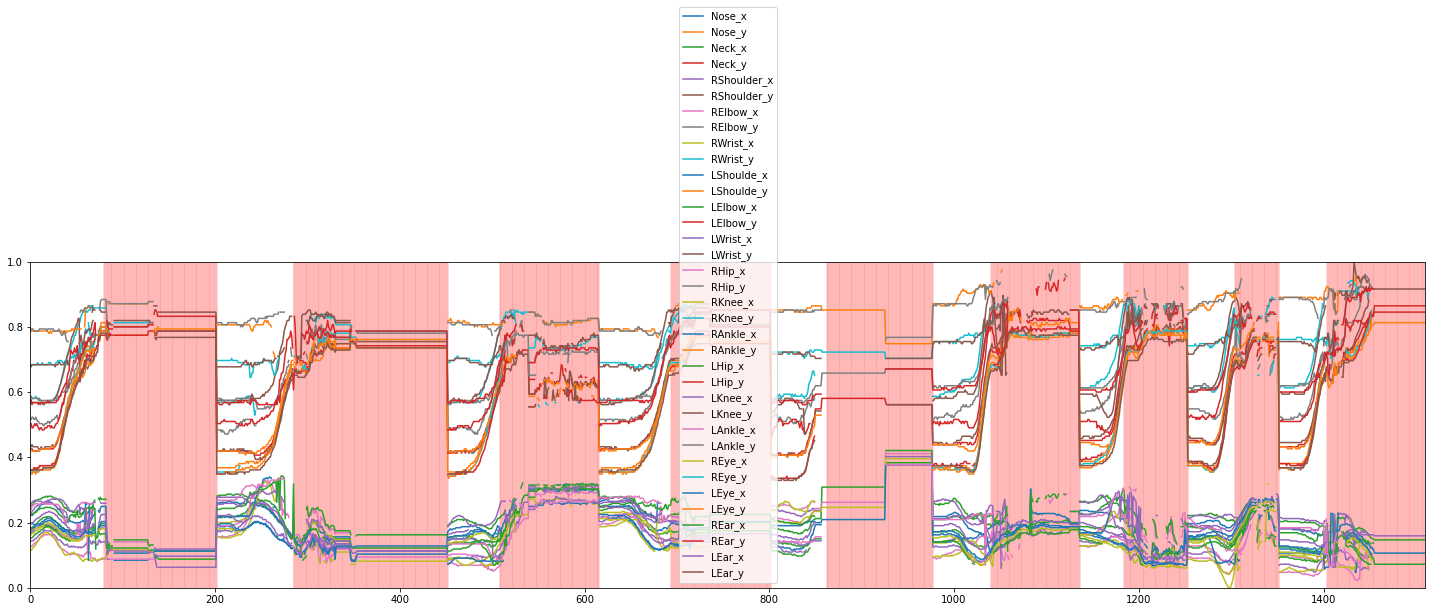

In [45]:
plt.figure(figsize=(25,6))
for body_part in body_parts:
    plt.plot(times, point_df[body_part], label=body_part)
    plt.xlim(0, end)
    plt.ylim(0, 1)
    
for frame_count in action_df.index:
    action = action_df.loc[frame_count]['action_gt_num']
    if action == 1:
        plt.axvspan(frame_count, frame_count+1, 0, 1, color = "red", alpha=0.1)
    elif action == 2:
        plt.axvspan(frame_count, frame_count+1, 0, 1, color = "blue", alpha=0.1)
    elif action == 3:
        plt.axvspan(frame_count, frame_count+1, 0, 1, color = "green", alpha=0.1)
    elif action == 4:
        plt.axvspan(frame_count, frame_count+1, 0, 1, color = "yellow", alpha=0.1)
plt.legend()
plt.show()

In [46]:
actions = action_df['action_gt_num']

In [47]:

action_start = []
action_end = []
action_types = []

last_action = 0
idle = 0
for num, action in enumerate(actions):
    if (action != last_action) and (action != 0):
        action_start.append(num)
        action_types.append(action)
    elif (action != last_action) and (action == 0):
        action_end.append(num)
    last_action = action
action_types = np.asarray(action_types)
action_start = np.asarray(action_start)
action_end = np.asarray(action_end)

In [48]:
action_ranges = np.empty((0 ,3))
action_range = np.zeros(3)

last_action = 0
idle = 0
for num, action in enumerate(actions):
    
    if (action != last_action) and (action != 0):
        action_range[0] = num
        action_range[2] = action
    elif (action != last_action) and (action == 0):
        action_range[1] = num
        action_ranges = np.vstack([action_ranges, action_range])
        action_range = np.zeros(3)
    last_action = action
action_ranges = action_ranges.astype(int)

In [49]:
action_dict

{0: 'stand', 1: 'fall', 2: 'sittingdown', 3: 'standingup', 4: 'sitdown'}

In [50]:
action_color = {'stand': 'green', 'fall': 'red', 'sittingdown': 'blue'}
action_num_color_dict = {0: 'green', 1: 'red', 2: 'blue', 3: 'orange', 4: 'skyblue'}

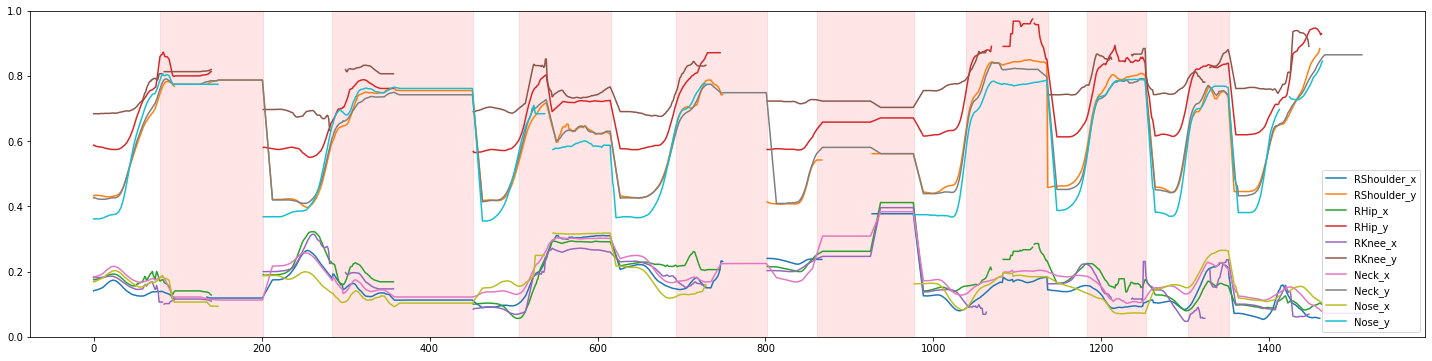

In [51]:

plt.figure(figsize=(25,6))
for action_range in action_ranges:
    plt.axvspan(action_range[0], action_range[1], 0, 1, color = action_num_color_dict[action_range[2]], alpha=0.1)

for body_part in ['RShoulder_x',
 'RShoulder_y',
 'RHip_x',
 'RHip_y',
 'RKnee_x',
 'RKnee_y',
 'Neck_x',
 'Neck_y',
 'Nose_x',
 'Nose_y',
                 ]:
    plt.plot(times, point_df.rolling(12, min_periods=1).mean()[body_part], label=body_part)
    #plt.xlim(3000, 4000)
    plt.ylim(0, 1)
        
plt.legend(loc='lower right')
plt.show()